# Detecting Lane Lines

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

Read and display the image

(540, 956, 3)

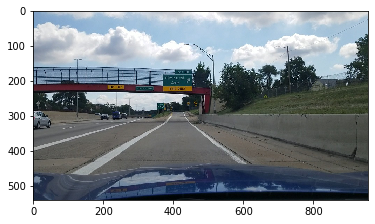

In [14]:
image_c = mpimg.imread('Road_Lane.jpg')
plt.imshow(image_c)  
image_c.shape

Convert to Grayscale

(540, 956)

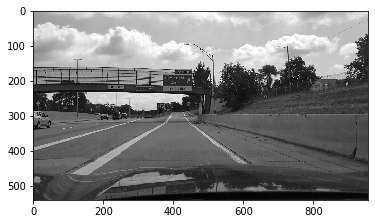

In [15]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray')  
image_g.shape

Gaussian Blurring

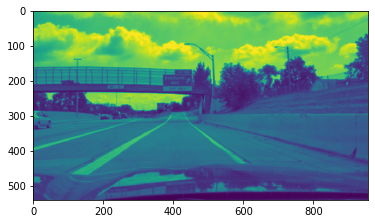

In [16]:
image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blurred)  

Canny

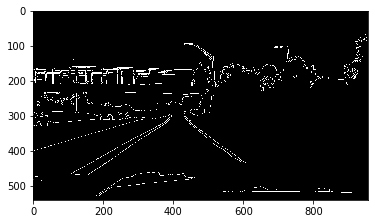

In [17]:
threshold_low = 10
threshold_high = 200

image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'gray')  

Define the Region of Interest (ROI)

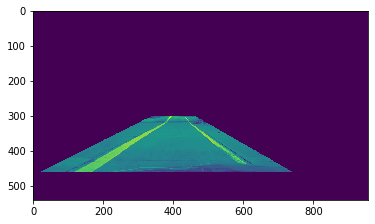

In [18]:
# Visualize the region of interest
vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)    
mask = np.zeros_like(image_g)   
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

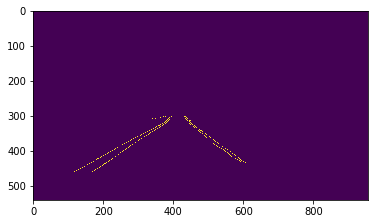

In [19]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

Hough Line Detection and Draw Function

In [20]:
rho = 2            # Distance resolution in pixels 
theta = np.pi/180  # Angular resolution in radians 
threshold = 40     # Minimum number of votes 
min_line_len = 100 # Minimum number of pixels making up a line
max_line_gap = 50  # Maximum gap in pixels between connectable line segments    
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [0, 255, 0], 20)
lines 

array([[[120, 459, 263, 377]],

       [[168, 460, 389, 311]],

       [[419, 301, 607, 433]],

       [[255, 382, 382, 317]],

       [[118, 460, 226, 400]],

       [[116, 460, 311, 352]]], dtype=int32)

In [21]:
α = 1
β = 1
γ = 0    

# Resultant weighted image is calculated as follows: [(original_img * α) + (canny_line_img * β) + γ]
image_with_lines = cv2.addWeighted(image_c, α, line_image, β, γ)

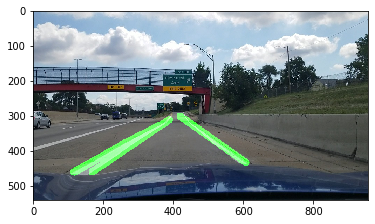

In [22]:
plt.figure()
plt.imshow(image_with_lines)